In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

# Direct CSV file URL (raw GitHub or hosted CSV link)
#url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/heart-disease/heart_failure_clinical_records_dataset.csv"

# Load dataset from URL
df = pd.read_csv("C:\\Users\\snistal\\Downloads\\heart_failure_clinical_records_dataset.csv")

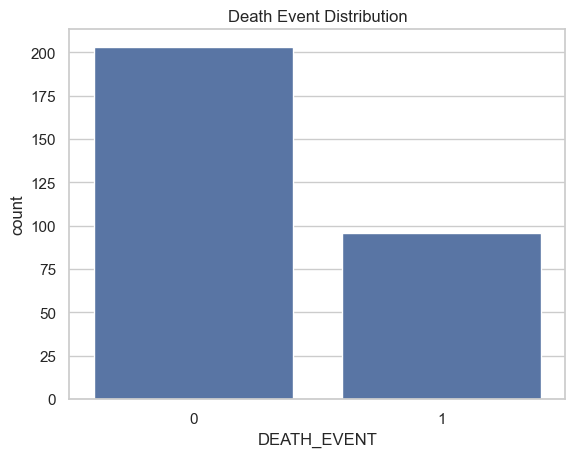

In [4]:
# Set style
sns.set(style="whitegrid")
# Target Variable Distribution
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Death Event Distribution')
plt.show()

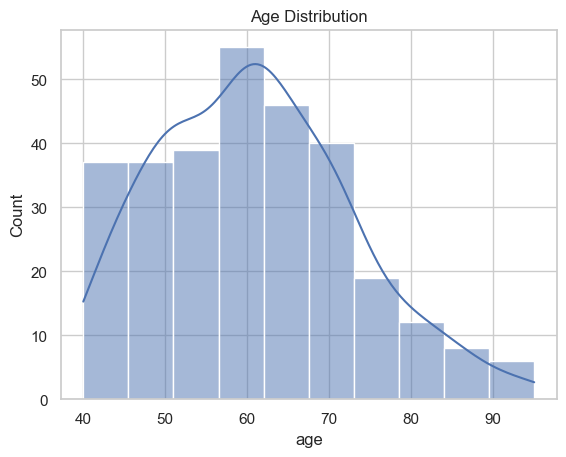

In [5]:
# Age Distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


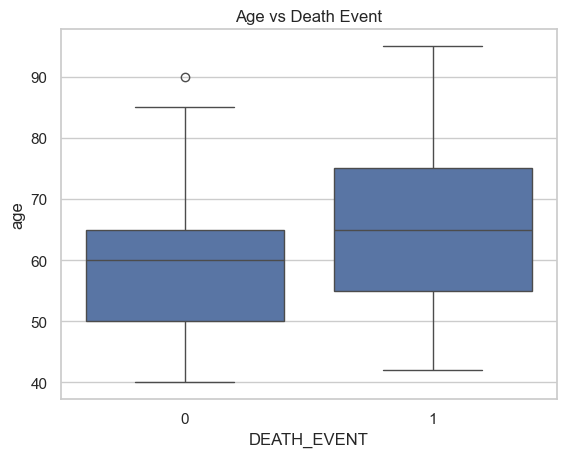

In [6]:
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age vs Death Event')
plt.show()


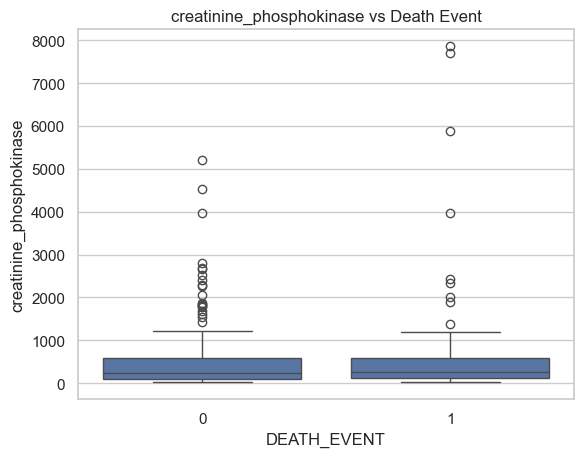

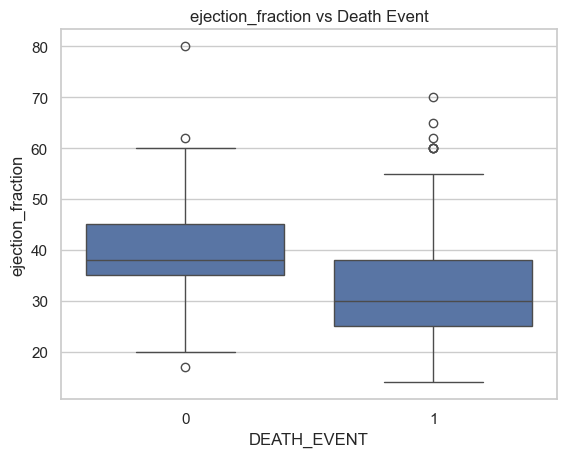

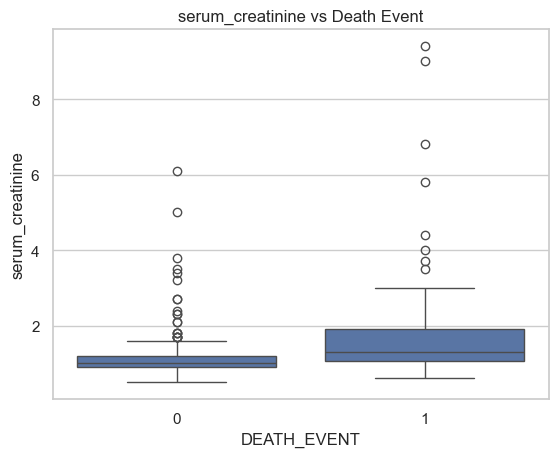

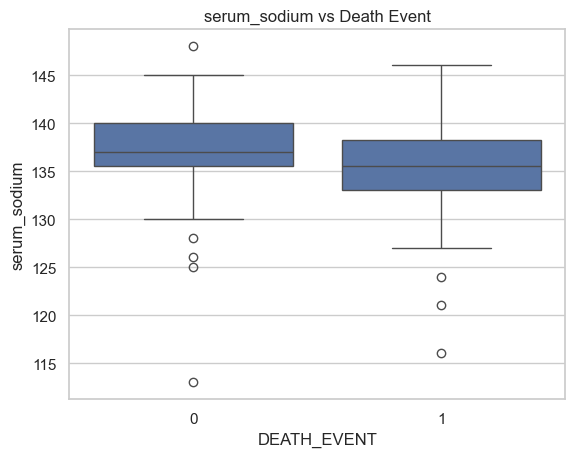

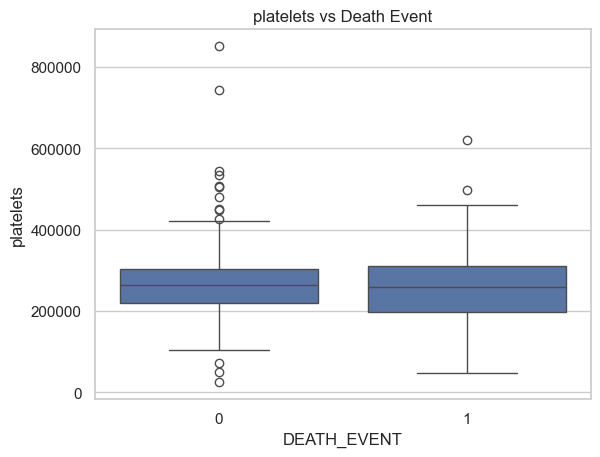

In [7]:
# Clinical Features vs DEATH_EVENT
numerical_features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets']
for feature in numerical_features:
    sns.boxplot(x='DEATH_EVENT', y=feature, data=df)
    plt.title(f'{feature} vs Death Event')
    plt.show()


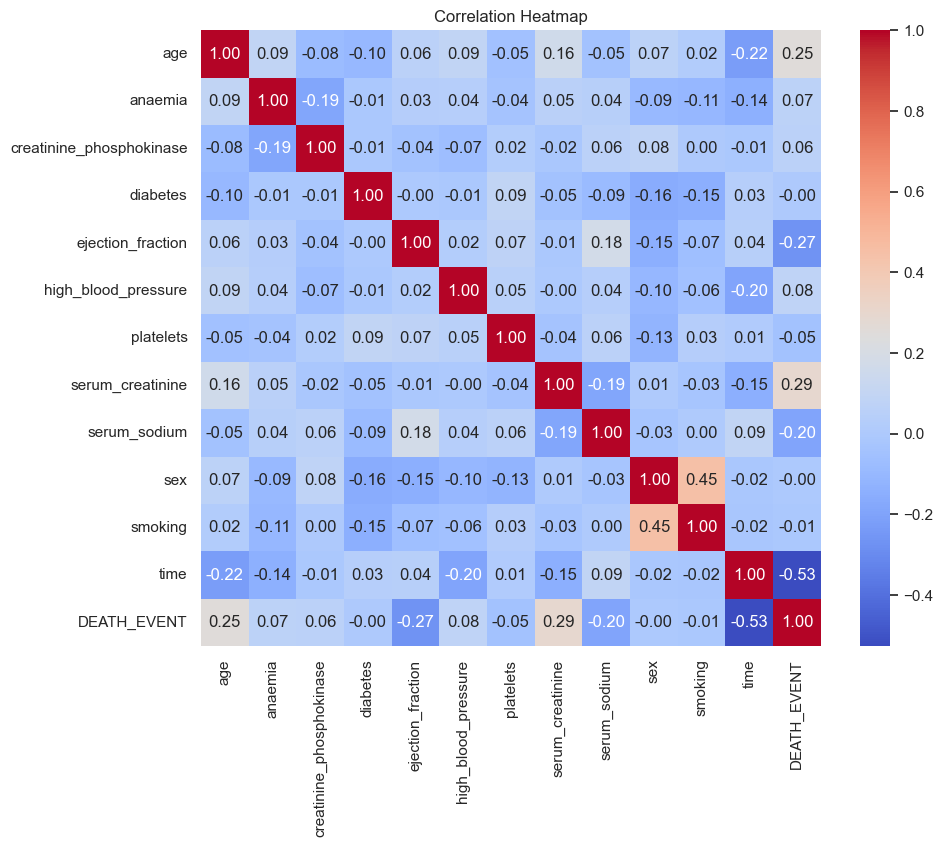

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

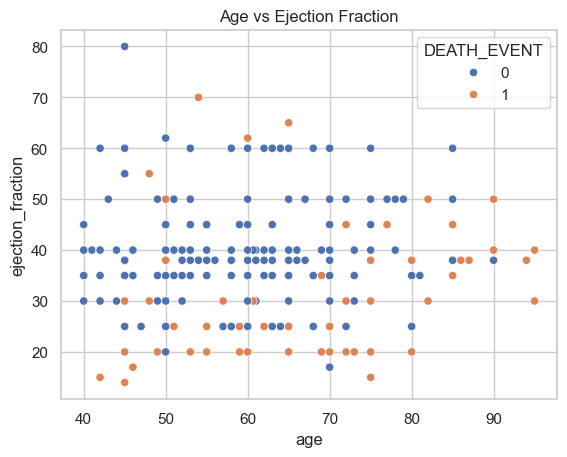

In [9]:
# Scatterplots
sns.scatterplot(x='age', y='ejection_fraction', hue='DEATH_EVENT', data=df)
plt.title('Age vs Ejection Fraction')
plt.show()


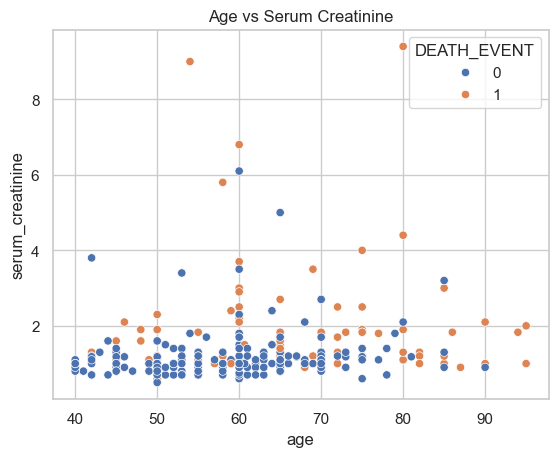

In [10]:
sns.scatterplot(x='age', y='serum_creatinine', hue='DEATH_EVENT', data=df)
plt.title('Age vs Serum Creatinine')
plt.show()


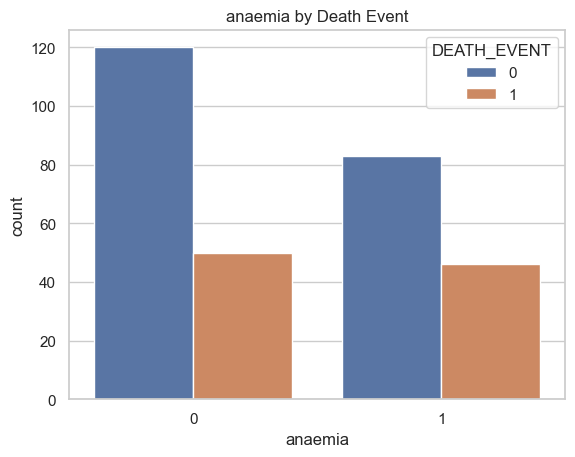

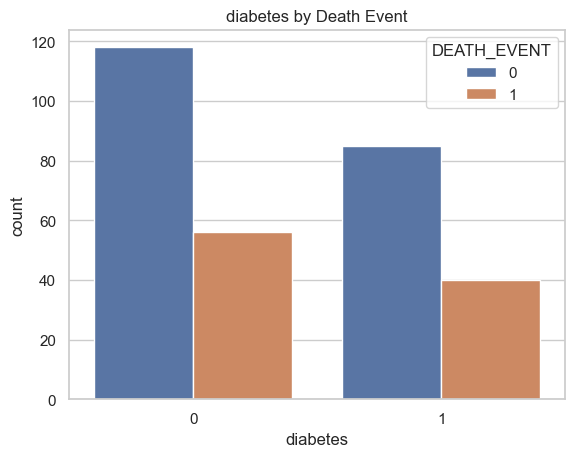

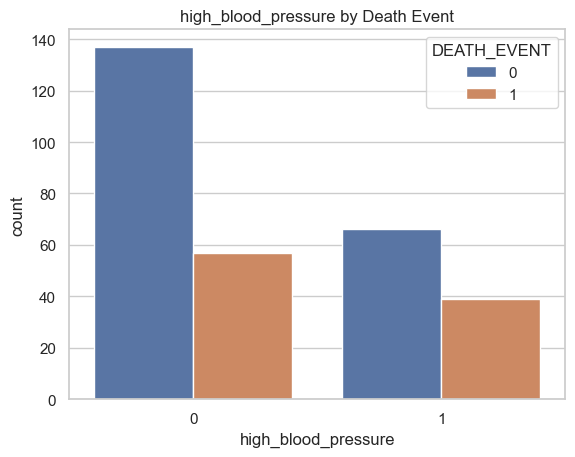

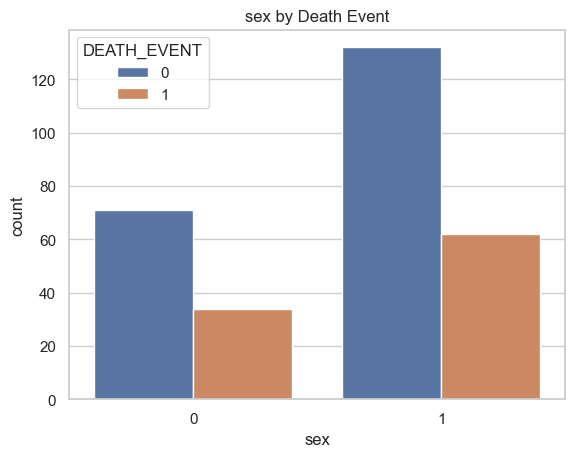

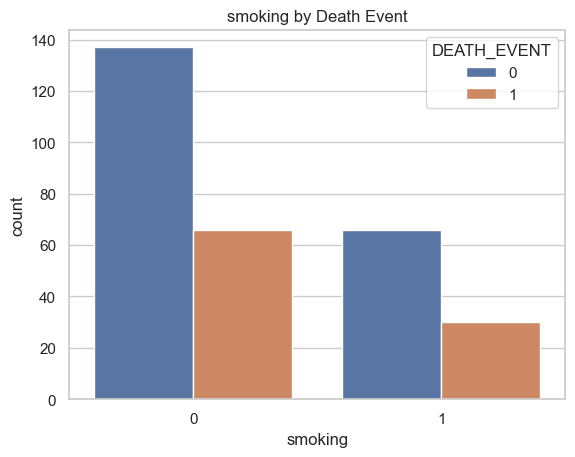

In [11]:
# Categorical Features
for feature in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']:
    sns.countplot(x=feature, hue='DEATH_EVENT', data=df)
    plt.title(f'{feature} by Death Event')
    plt.show()


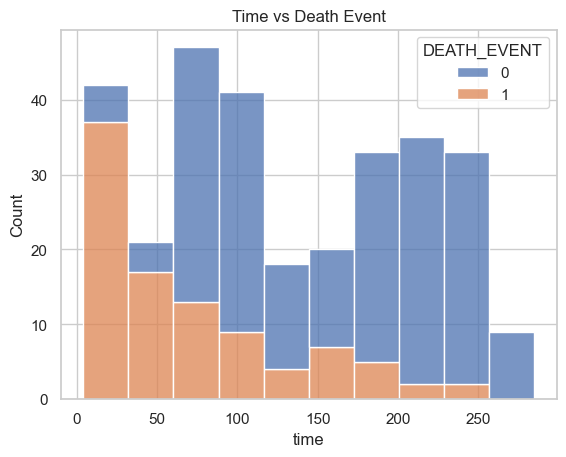

In [12]:
# Follow-up Time
sns.histplot(data=df, x='time', hue='DEATH_EVENT', multiple='stack')
plt.title('Time vs Death Event')
plt.show()


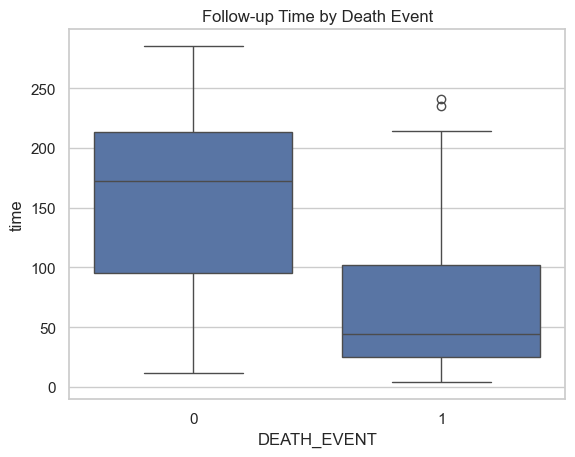

In [13]:
sns.boxplot(x='DEATH_EVENT', y='time', data=df)
plt.title('Follow-up Time by Death Event')
plt.show()


C:\Users\snistal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\snistal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 33.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


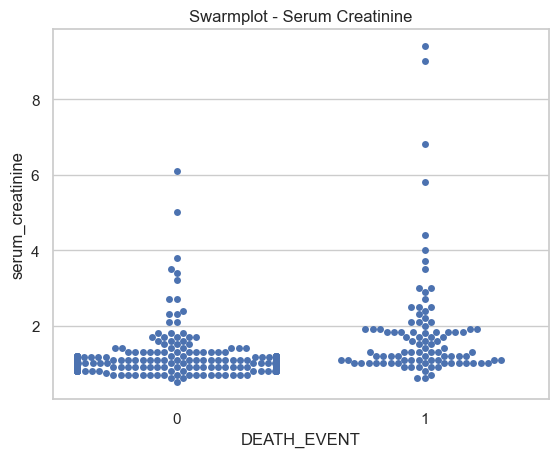

In [14]:
# Swarmplot for Outliers
sns.swarmplot(x='DEATH_EV`ENT', y='serum_creatinine', data=df)
plt.title('Swarmplot - Serum Creatinine')
plt.show()

In [15]:
# KDE Plots using scipy (manual fix)
def manual_kde_plot(data1, data2, label1, label2, feature):
    kde1 = gaussian_kde(data1)
    kde2 = gaussian_kde(data2)

    x_vals = np.linspace(min(data1.min(), data2.min()), max(data1.max(), data2.max()), 200)

    plt.plot(x_vals, kde1(x_vals), label=label1)
    plt.plot(x_vals, kde2(x_vals), label=label2)
    plt.fill_between(x_vals, kde1(x_vals), alpha=0.3)
    plt.fill_between(x_vals, kde2(x_vals), alpha=0.3)
    plt.title(f'{feature} KDE Plot')
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()


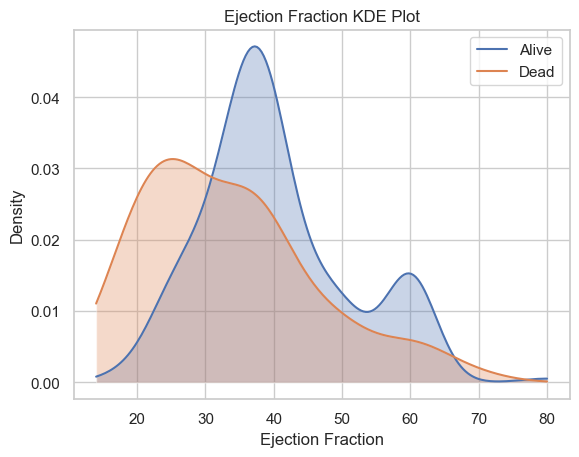

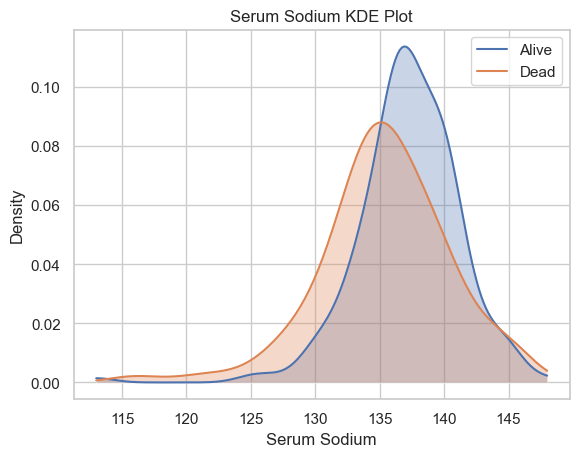

In [16]:
# Clean data
df['ejection_fraction'] = pd.to_numeric(df['ejection_fraction'], errors='coerce')
df['serum_sodium'] = pd.to_numeric(df['serum_sodium'], errors='coerce')

alive_ejection = df[df['DEATH_EVENT'] == 0]['ejection_fraction'].dropna().astype(float)
dead_ejection = df[df['DEATH_EVENT'] == 1]['ejection_fraction'].dropna().astype(float)

alive_sodium = df[df['DEATH_EVENT'] == 0]['serum_sodium'].dropna().astype(float)
dead_sodium = df[df['DEATH_EVENT'] == 1]['serum_sodium'].dropna().astype(float)

# KDE plots
manual_kde_plot(alive_ejection, dead_ejection, 'Alive', 'Dead', 'Ejection Fraction')
manual_kde_plot(alive_sodium, dead_sodium, 'Alive', 'Dead', 'Serum Sodium')